<a href="https://colab.research.google.com/github/zxxoxnee/Machine-Learning/blob/master/Regression%EC%9C%BC%EB%A1%9C_%EB%B3%B4%EC%8A%A4%ED%84%B4_%EB%B6%80%EB%8F%99%EC%82%B0_%EA%B0%80%EA%B2%A9_%EC%98%88%EC%B8%A1%ED%95%B4%EB%B3%B4%EA%B8%B0_(Feature_Generation_%26_Advanced_Estimator).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 보스턴 부동산 데이터의 특징들(Features)
1. CRIM: 도시별 범죄발생률
2. ZN: 25,000평을 넘는 토지의 비율
3. INDUS: 도시별 비상업 지구의 비유
4. CHAS: 찰스 강의 더미 변수(1 = 강의 경계, 0 = 나머지)
5. NOX: 일산화질소 농도
6. RM: 주거할 수 있는 평균 방의개수
7. AGE: 1940년 이전에 지어진 주택의 비율
8. DIS: 5개의 고용지원센터까지의 가중치가 고려된 거리
9. RAD: 고속도로의 접근 용이성에 대한 지표
10. TAX: 10,000달러당 재산세 비율
11. PTRATIO: 도시별 교사와 학생의 비율 
12. B: 도시의 흑인 거주 비유
13. LSTAT: 저소득층의 비율
14. MEDV: 본인 소유 주택 가격의 중앙값

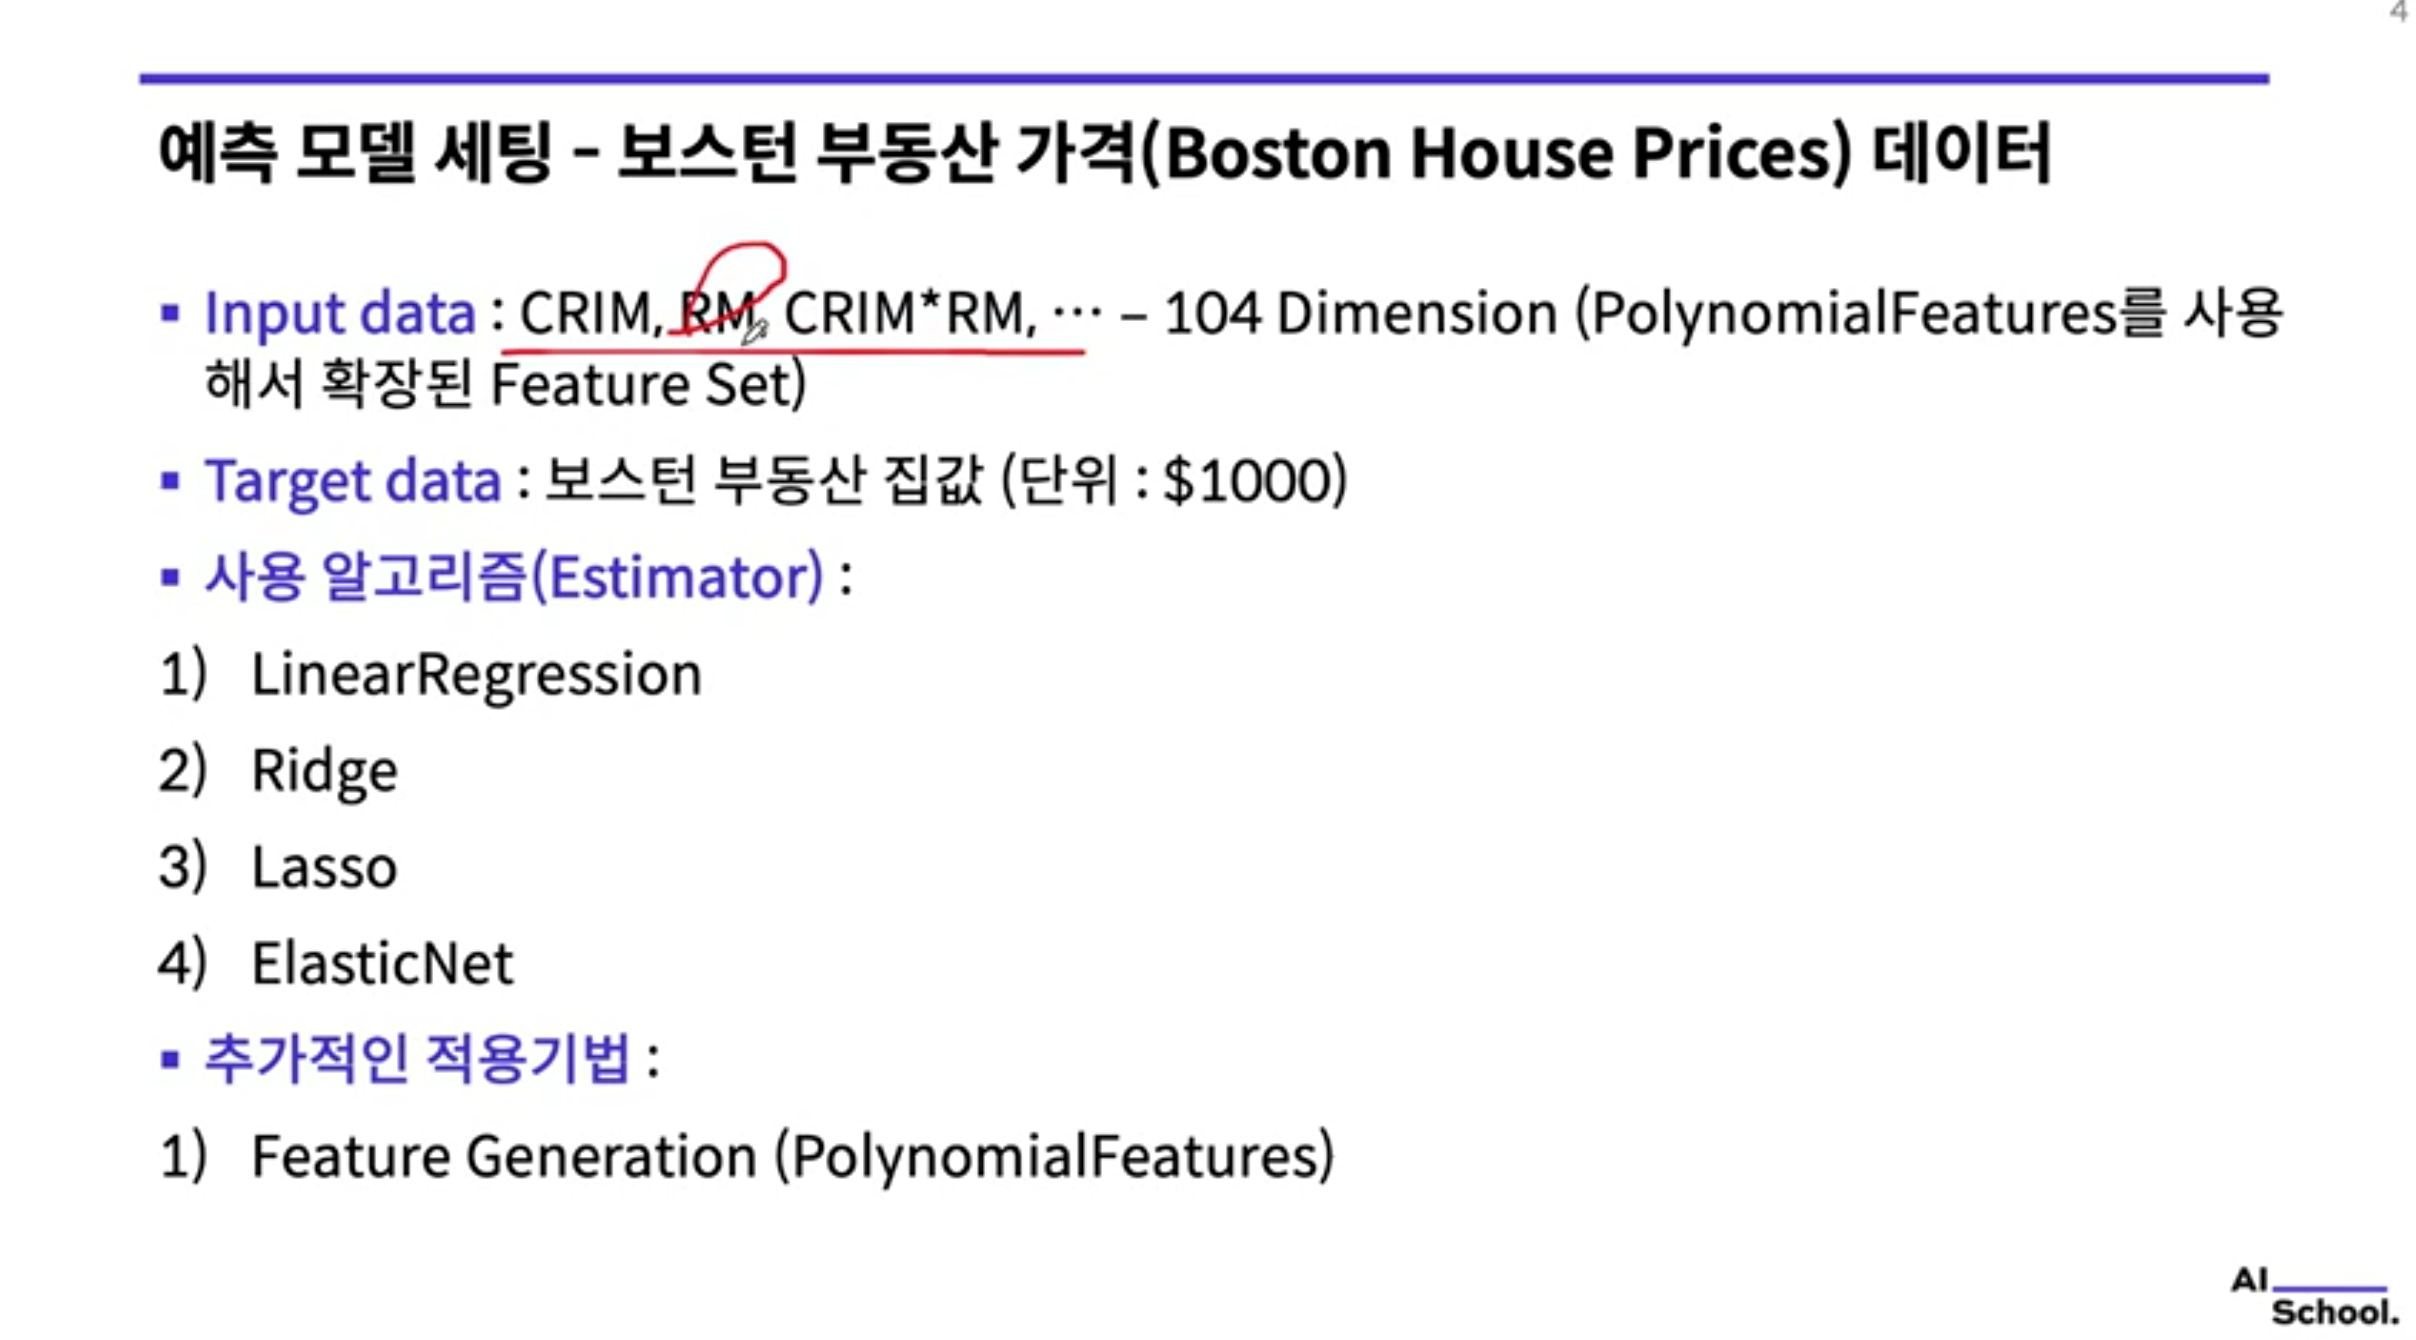

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_boston
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [ ]:
np.random.seed(42)

In [4]:
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures

# make extend boston dataset
# Refernce : https://github.com/amueller/mglearn/blob/master/mglearn/datasets.py#L30
def load_extended_boston():
    boston = load_boston()
    X = boston.data

    X = MinMaxScaler().fit_transform(boston.data)
    X = PolynomialFeatures(degree=2, include_bias=False).fit_transform(X)

    return X, boston.target

In [5]:
# 특징이 확장된 보스턴 부동산 가격 데이터 불러오기
X, y = load_extended_boston()
print(X)
print(y)
print('Extended Feature Shape :', X.shape)

[[0.00000000e+00 1.80000000e-01 6.78152493e-02 ... 1.00000000e+00
  8.96799117e-02 8.04248656e-03]
 [2.35922539e-04 0.00000000e+00 2.42302053e-01 ... 1.00000000e+00
  2.04470199e-01 4.18080621e-02]
 [2.35697744e-04 0.00000000e+00 2.42302053e-01 ... 9.79579831e-01
  6.28144504e-02 4.02790570e-03]
 ...
 [6.11892474e-04 0.00000000e+00 4.20454545e-01 ... 1.00000000e+00
  1.07891832e-01 1.16406475e-02]
 [1.16072990e-03 0.00000000e+00 4.20454545e-01 ... 9.82676920e-01
  1.29930407e-01 1.71795127e-02]
 [4.61841693e-04 0.00000000e+00 4.20454545e-01 ... 1.00000000e+00
  1.69701987e-01 2.87987643e-02]]
[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

## baseline 성능
Regression으로_보스턴_부동산_가격_예측해보기 (EDA & Feature Selection).ipynb : https://colab.research.google.com/drive/1Kjf7mx2ZVIQGVcL5zQDbGBPJ0o_LJY0m?usp=sharing
#### baseline #1 - Average MSE : 37.13180746769903 (기본 Linear Regression)
#### baseline #2 - Average MSE : 34.10008149030686 (기본 Linear Regression + Feature Selection 적용)

In [6]:
from sklearn.model_selection import KFold

num_split = 5
kf = KFold(n_splits=num_split)

avg_MSE = 0.0
for train_index, test_index in kf.split(X):
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
  # 선형회귀(Linear Regression) 모델 선언하기
  lr = LinearRegression()

  # 선형회귀(Linear Regression) 모델 학습하기
  lr.fit(X_train, y_train)

  # 테스트 데이터에 대한 예측을 수행합니다.
  y_pred = lr.predict(X_test)

  # MSE(Mean Squared Error)를 측정합니다.
  avg_MSE = avg_MSE + mean_squared_error(y_test, y_pred)

print('Average MSE :', avg_MSE/num_split)
print('Avergae RMSE :', np.sqrt(avg_MSE/num_split))

Average MSE : 131.74003779482732
Avergae RMSE : 11.477806314571932


In [8]:
from sklearn.linear_model import Ridge

num_split = 5
kf = KFold(n_splits=num_split)

avg_MSE = 0.0
for train_index, test_index in kf.split(X):
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
  # 선형회귀(Linear Regression) 모델 선언하기
  ridge_reg = Ridge(alpha=0.8) #하이퍼파라미터 값을 지정하면서 성능 평가

  # 선형회귀(Linear Regression) 모델 학습하기
  ridge_reg.fit(X_train, y_train)

  # 테스트 데이터에 대한 예측을 수행합니다.
  y_pred = ridge_reg.predict(X_test)

  # MSE(Mean Squared Error)를 측정합니다.
  avg_MSE = avg_MSE + mean_squared_error(y_test, y_pred)

print('Average MSE :', avg_MSE/num_split)
print('Avergae RMSE :', np.sqrt(avg_MSE/num_split))

Average MSE : 21.413112479618995
Avergae RMSE : 4.627430440278816


In [9]:
from sklearn.linear_model import Lasso

num_split = 5
kf = KFold(n_splits=num_split)

avg_MSE = 0.0
for train_index, test_index in kf.split(X):
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
  # 선형회귀(Linear Regression) 모델 선언하기
  lasso_reg = Lasso(alpha=0.025)

  # 선형회귀(Linear Regression) 모델 학습하기
  lasso_reg.fit(X_train, y_train)

  # 테스트 데이터에 대한 예측을 수행합니다.
  y_pred = lasso_reg.predict(X_test)

  # MSE(Mean Squared Error)를 측정합니다.
  avg_MSE = avg_MSE + mean_squared_error(y_test, y_pred)

print('Average MSE :', avg_MSE/num_split)
print('Avergae RMSE :', np.sqrt(avg_MSE/num_split))

Average MSE : 22.698063582432393
Avergae RMSE : 4.764248480341091


In [10]:
from sklearn.linear_model import ElasticNet

num_split = 5
kf = KFold(n_splits=num_split)

avg_MSE = 0.0
for train_index, test_index in kf.split(X):
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
  # 선형회귀(Linear Regression) 모델 선언하기
  elasticnet_reg = ElasticNet(alpha=0.003)

  # 선형회귀(Linear Regression) 모델 학습하기
  elasticnet_reg.fit(X_train, y_train)

  # 테스트 데이터에 대한 예측을 수행합니다.
  y_pred = elasticnet_reg.predict(X_test)

  # MSE(Mean Squared Error)를 측정합니다.
  avg_MSE = avg_MSE + mean_squared_error(y_test, y_pred)

print('Average MSE :', avg_MSE/num_split)
print('Avergae RMSE :', np.sqrt(avg_MSE/num_split))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.724e+03, tolerance: 3.919e+00
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.557e+03, tolerance: 3.307e+00
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisa

Average MSE : 21.260016353318818
Avergae RMSE : 4.61085852670832


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.455e+02, tolerance: 3.481e+00
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
